In [71]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

import plotly.express as px
import plotly.graph_objects as go

In [2]:
# loading the original dataset with pandas
df = pd.read_csv('Shill Bidding Dataset.csv')

# presenting the first five lines
df.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [35]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [24]:
df.duplicated().any()

False

In [ ]:
# Use at least 3 plots to gain valuable insight about some of the variables. 
# Explain in the information that the visualisations provide. [0-10]

The following boxplot illustrates the distribution of bids among the 1054 distinct bidders identified using the `Bidder_ID` feature, which serves as a unique identifier for each bidder, and `Record_ID` to count the amount of distinct bids for each bidder. As indicated, three quarters of bidders made 7 bids or fewer, with some outliers making up to 112 bids. It is worth noting that the most frequently occurring number of bids per bidder was 1.

In [28]:
bids_per_bidder = df.pivot_table(index='Bidder_ID', values='Record_ID', aggfunc='count')

fig = px.box(bids_per_bidder, x='Record_ID', width=800, height=400)

fig.update_layout(
    title='Distribution of Bids Per Bidder',
    xaxis_title='Bids Per Bidder'
)

fig.show()


Given there are 807 distinct auctions identified using the `Auction_ID` feature, which serves as a unique identifier for each auction

In [58]:
len(df['Auction_ID'].unique())

807

The following histogram shows the distribution of bids among the `Record_ID` to count the amount of distinct bids for each auction. As shown, half of the auctions received 7 bids or fewer, with a few outliers receiving 26 bids. It is worth mentioning that the most frequently occurring value, or the mode, was 5. 

In [62]:
# calculating amount of bids/records for each Auction_ID
bids_per_auction = df.pivot_table(index='Auction_ID', values='Record_ID', aggfunc='count')

fig = go.Figure(data=[go.Histogram(
    x=bids_per_auction['Record_ID'],
    xbins=dict(size=1)
)])

fig.update_layout(
    title='Distribution of Bids per Auction',
    xaxis=dict(title='Amount of Auctions'),
    yaxis=dict(title='Bids Received by Auction'),
    bargap=0.1
)

fig.show()

In [67]:
target = 'Class'
X = df.drop([target, 'Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)
y = df[target]

# splitting data into train and test sets
X_train_u, X_test, y_train_u, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_names = {0:'Normal', 1:'Abnormal'}
print(y_train_u.value_counts(normalize=True).rename(index=class_names))

Normal      0.890371
Abnormal    0.109629
Name: Class, dtype: float64


In [68]:
[
    X_train_u.shape, y_train_u.shape, 
    X_test.shape, y_test.shape
]


[(4424, 9), (4424,), (1897, 9), (1897,)]

In [69]:
# balancing data 
balancing = RandomUnderSampler(random_state=42)

X_train, y_train = balancing.fit_resample(X_train_u, y_train_u)

# class_names = {0:'Non Sev Slug', 1:'SEV SLUGGING'}
print(y_train.value_counts(normalize=True).rename(index=class_names))
print([X_train.shape, y_train.shape])

Normal      0.5
Abnormal    0.5
Name: Class, dtype: float64
[(970, 9), (970,)]


In [75]:
df_clean = df.copy()
df_clean = df_clean.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)

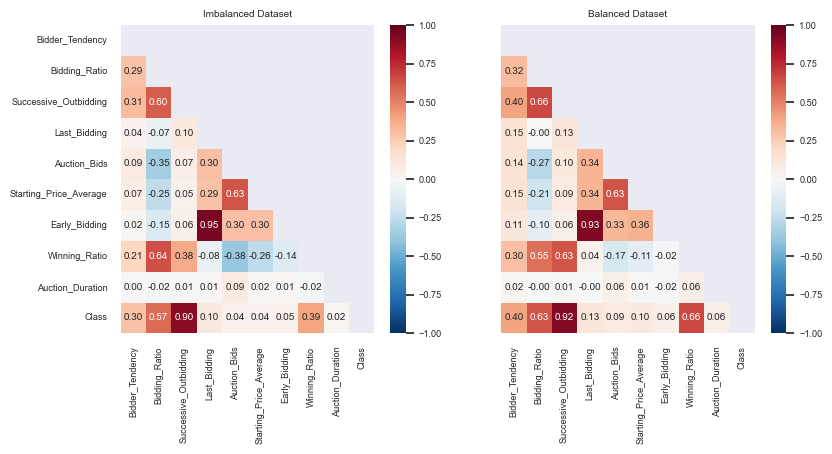

In [76]:
# Computing the correlations from imbalanced data set
corr_before_sampling = df_clean.corr()

# Creating a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_before_sampling, dtype=bool))

# Plotting the heatmap with the mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sns.set(font_scale=0.6)

sns.heatmap(
    corr_before_sampling, annot=True, mask=mask, ax=ax1, fmt='.2f', 
    cmap='RdBu_r', vmin=-1, vmax=1
)

ax1.set_title('Imbalanced Dataset')



# Computing the correlations using X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)
corr_after_sampling = train_df.corr()

# Creating a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_after_sampling, dtype=bool))

# Plotting the heatmap with the mask
sns.heatmap(
    corr_after_sampling, annot=True, mask=mask, ax=ax2, fmt='.2f', 
    cmap='RdBu_r', vmin=-1, vmax=1, yticklabels=False
)

ax2.set_title('Balanced Dataset')


# Add space between the two charts
plt.subplots_adjust(wspace=0.2)

plt.show()

del train_df


In [ ]:
# Perform a clustering visualisation using a library of your choice. 
# Justify your selection and identify interesting features in the graph.[0-20]

In [ ]:
# Create at least two interactive plots based on the data. 
# Justify the functionality, design, colour selection and any other details that you deem important.[0-20]

In [ ]:
# Create a Dashboard using a library of your choice that encompasses at least 2 of your visualizations [0-30]